# Imports 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'playground'))
sys.path.insert(0, os.path.join(os.getcwd(), '..', 'data', 'price'))
from price_data import *

In [3]:
from IPython.display import Javascript

In [4]:
import playground
import price_data
from trading_bot_class import *
import requests
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import utils
import time
from matplotlib import pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Main Run

In [6]:
def total_fitness(bot,data):
    """
    :param bot:
    :param data:
    :return:
    """
    for company_name,company_price,company_senti in data:
        company_fit = playground.evaluate_fitness(bot, company_price, company_senti)
        bot.add_fitness(company_fit)
        bot.reset_attributes(1000,company_name)
    print(bot.get_fitness())
    return bot.get_fitness()

## Settings/Data 

In [7]:
NUM_GENERATIONS = 250
NUM_BOTS = 40
START_AMT = 1000.0
histPathStr = os.path.join(os.getcwd(), '..', 'data', 'twitter', 'historical.csv')
## generate 100 random bots
bots = []
data = []

# FB_price_data = price_data.get_google_finance_intraday('FB', period=600, days=70)
# fb_tweets = playground.get_company_tweets(histPathStr, '(F|f)acebook')
# data.append(('FB',FB_price_data,fb_tweets))

MSFT_price_data = price_data.get_google_finance_intraday('MSFT', period=600, days=70)
msft_tweets = playground.get_company_tweets(histPathStr, '(M|m)icrosoft')
data.append(('MSFT',MSFT_price_data,msft_tweets))

# apple_price = price_data.get_google_finance_intraday('AAPL', period=600, days=70)
# apple_tweets = playground.get_company_tweets(histPathStr, '(A|a)pple')
# data.append(('AAPL',apple_price,apple_tweets))

/home/ubuntu/StockBot/playground/../playground/playground.py:158: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  company_tweets = data.loc[data['Texts'].str.contains(company_regex, na=False)]


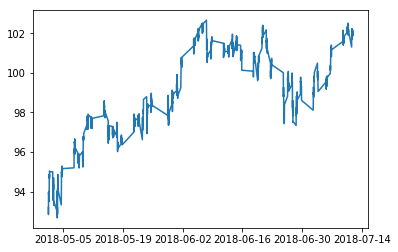

In [8]:
# plt.plot(FB_price_data['Open'])
# plt.show()
plt.plot(MSFT_price_data['Open'])
plt.show()
# plt.plot(apple_price['Open'])
# plt.show()

## Generate/Reset Bots 

In [9]:
bots = []
for i in range(NUM_BOTS):
    bots.append(TradingBot(1000.0,'MSFT', utils.createDummy()))

In [15]:
for i, bot in enumerate(bots):
#     if i >= 7*len(bots)/20:
#         bot.reset_attributes(1000, '', resetFitness=True)

    bot.reset_attributes(1000, '', resetFitness=True)

In [9]:
botWeights = utils.loadGeneration()
# for i, b in enumerate(bots):
#     b.neural_net = botWeights[i]

In [10]:
superBot = TradingBot(1000.0,'MSFT', utils.createDummy())
superBot.neural_net = botWeights[0]

Starting to trade:  
Money:  55.122999999999934  bought at:  94.4877  shares:  10


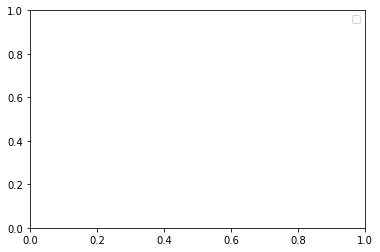

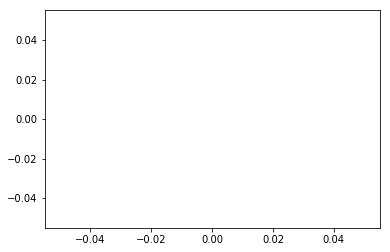

Fitness from    :  1074.923
1074.923


In [21]:
superBot.reset_attributes(1000, '', resetFitness=True)
for company_name,company_price,company_senti in data:
    company_fit = playground.evaluate_fitness(superBot, company_price, company_senti, debug_mode=True, print_trades=True)
    superBot.add_fitness(company_fit)
print(superBot.get_fitness())

##  Main

In [ ]:
for generation_index in range(NUM_GENERATIONS):
        
#     utils.saveGeneration(bots, generation_index)
    startTime = time.time()
    average_fitness = []
    current_average = 0
    
    if generation_index == 0:
        for i, bot in enumerate(bots):
            current_average += total_fitness(bot,data)
            
    else:
        for i, bot in enumerate(bots):
            if i >= 7*len(bots)/20:
                current_average += total_fitness(bot,data)
            else :
                print(bot.fitness)
                current_average += bot.fitness
            
    current_average = current_average / float(NUM_BOTS)
#     utils.saveGeneration()

    average_fitness.append(current_average)
    growth = (current_average - START_AMT) / START_AMT

    bitErrRate = 1.0 / (current_average)
    bots = utils.getNextGen(bots, bitErrRate)
    
    print(generation_index, 'a',current_average, '    g', growth, 'Time:', time.time() - startTime)
    
    if generation_index % 5 == 0 and generation_index:
        utils.saveGeneration(bots, NUM_BOTS)
    
    for i, bot in enumerate(bots):
        if i >= 7*len(bots)/20:
            bot.reset_attributes(1000, '', resetFitness=True)
    


1074.923


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


1000.0
1074.923
1074.923
1000.0
1079.3000000000002
1000.0
1074.923
1074.923
1074.923
1074.923
1000.0
1000.0
1079.3000000000002
1074.923
1086.7
1079.3000000000002
1000.0
1079.0500000000002
1079.0500000000002
1079.3000000000002
1074.923
1000.0
1074.923
1079.3000000000002
1091.6090000000017
1074.923
1082.415
1024.422399999999
1081.799000000001
1079.3000000000002
1000.0
1000.0
1074.923
1000.0
1091.8268000000014
1074.923
1000.0
1083.63
1074.923
0 a 1055.630605     g 0.05563060500000006 Time: 264.62933897972107
1091.8268000000014
1091.6090000000017
1086.7
1083.63
1082.415
1081.799000000001
1079.3000000000002
1079.3000000000002
1079.3000000000002
1079.3000000000002
1079.3000000000002
1079.3000000000002
1079.0500000000002
1079.0500000000002
1000.0
1000.0
1010.6200000000001
1012.5550000000001
1074.923
1076.1219999999998
1000.0
1074.923
1074.923
1074.923
1074.923
1074.923
1074.923
1066.7379999999985
1000.0
1074.923
1000.0
1000.0
1000.0
1074.923
1074.923
1074.923
1074.923
1000.0
1000.0


In [ ]:
utils.saveGeneration(bots, generation_index)


In [ ]:
len(bots)

In [ ]:
# save
i = 1
for bot in bots:
    filepath = 'botSaves/bot%d.h5' % i
    bot.neural_net.save(filepath)
    i += 1

# Testing Testing 123 

In [ ]:
data_test = []
ibm_price = price_data.get_google_finance_intraday('IBM', period=600, days=70)
ibm_tweets = playground.get_company_tweets(histPathStr, '(IBM|Ibm)')
data_test.append(('IBM',ibm_price,ibm_tweets))

TWTR_price_data = price_data.get_google_finance_intraday('TWTR', period=600, days=70)
TWTR_tweets = playground.get_company_tweets(histPathStr, '(T|t)witter')
data_test.append(('TWTR',TWTR_price_data,TWTR_tweets))

dell_price = price_data.get_google_finance_intraday('DVMT', period=600, days=70)
dell_tweets = playground.get_company_tweets(histPathStr, '(D|d)ell')
data_test.append(('DELL',dell_price,dell_tweets))

In [ ]:
plt.plot(ibm_price['Open'])
plt.show()
plt.plot(TWTR_price_data['Open'])
plt.show()
plt.plot(dell_price['Open'])
plt.show()


In [ ]:
for i, bot in enumerate(bots):
    total_fitness(bot,data_test)
    